# 120 Years of Olympics Data

This data set was taken from kagggle and contains 120 years of info about Olympic athletes. We used this data set to practice some hypothesis testing. The data can be found here:

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results


In [1]:
# Libraries
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
# load the dataframe and check it out with pandas-profiling
df = pd.read_csv('athlete_events.csv')
profile = pandas_profiling.ProfileReport(df)
profile

/usr/local/lib/python3.7/site-packages/pandas_profiling/describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,271116
Total Missing (%),8.9%
Total size in memory,31.0 MiB
Average record size in memory,120.0 B
Numeric,5
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [3]:
# There are misnamed teams- for example two teams named Russia and Russia1, France and France1, etc. To fix
# this, another csv provided by kaggle contains a column called region that will name the country appropriately
# Merging that to our current dataframe.
noc_regions = pd.read_csv('noc_regions.csv')
df = df.merge(noc_regions, on='NOC')

In [4]:
# Since we want to explore BMI, we have to handle the missing data within these fields
# We elected to drop them as we think this won't bias the distribution as much as alternative 
# ways of handling it. We decided to do age as well to observe the age distribution later

bmi_df = df.dropna(subset = ['Age', 'Height', 'Weight'])

profile = pandas_profiling.ProfileReport(bmi_df)
profile

/usr/local/lib/python3.7/site-packages/pandas_profiling/describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,18
Number of observations,205911
Total Missing (%),10.2%
Total size in memory,28.3 MiB
Average record size in memory,144.0 B
Numeric,6
Categorical,12
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Have Atheletes physically changed over time? BMI as measure
Looking at populations of athletes between the years 1900-1916 to compare to the populations of 2000-2016 to see if BMI has changed. Grabbing the relevant data

In [5]:
# Making a BMI column
# Converting weight to lbs from kg.
# Want a df with height in inches, weight in lbs and a BMI

# Making backup copies of working df
bmi_df_copy = bmi_df.copy()


# First working on BMI

# Converting height to meters for BMI calculation
bmi_df_copy['Height'] = bmi_df_copy['Height']/100

# Making the BMI column
bmi_df_copy['BMI'] = bmi_df_copy['Weight']/(bmi_df_copy['Height']**2)

# Convert weight to lbs
bmi_df_copy['Weight'] = round(bmi_df_copy['Weight']*2.20462,1)

# Converting cm to inches
bmi_df_copy['Height'] = round(bmi_df_copy['Height']*100*0.393701,1)

bmi_df_copy # looks good



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
0,1,A Dijiang,M,24.0,70.9,176.4,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,24.691358
1,2,A Lamusi,M,23.0,66.9,132.3,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,20.761246
2,602,Abudoureheman,M,22.0,71.7,165.3,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,22.642193
3,1463,Ai Linuer,M,25.0,63.0,136.7,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,24.218750
4,1464,Ai Yanhan,F,14.0,66.1,119.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,19.132653
5,1464,Ai Yanhan,F,14.0,66.1,119.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,19.132653
6,3605,An Weijiang,M,22.0,70.1,158.7,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN,22.724403
7,3605,An Weijiang,M,22.0,70.1,158.7,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN,22.724403
8,3610,An Yulong,M,19.0,68.1,154.3,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China,NaN,23.388687
9,3610,An Yulong,M,19.0,68.1,154.3,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China,NaN,23.388687


In [6]:
bmi_df = bmi_df_copy

In [7]:
# Picking out the range of years we want to observe
bmi_df_1900 = bmi_df[(bmi_df['Year'] >=1900) & (bmi_df['Year'] <= 1916)]
bmi_df_2000 = bmi_df[(bmi_df['Year'] >=2000) & (bmi_df['Year'] <= 2016)]

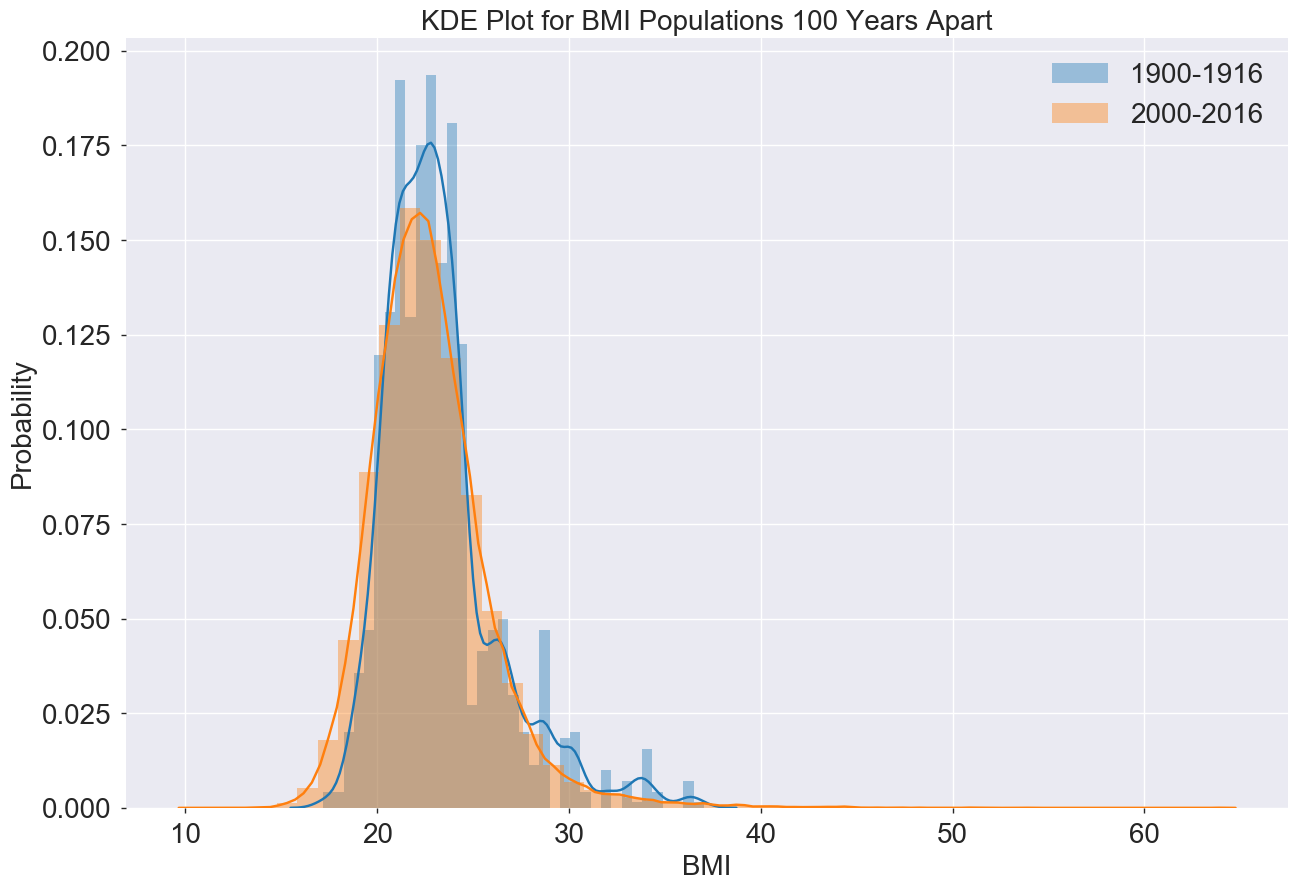

In [15]:
# Looking at the kde
plt.figure(figsize = (15,10))
sns.distplot(bmi_df_1900['BMI'], label = '1900-1916')
sns.distplot(bmi_df_2000['BMI'], label = '2000-2016')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BMI', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.title('KDE Plot for BMI Populations 100 Years Apart', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('KDEBMI')

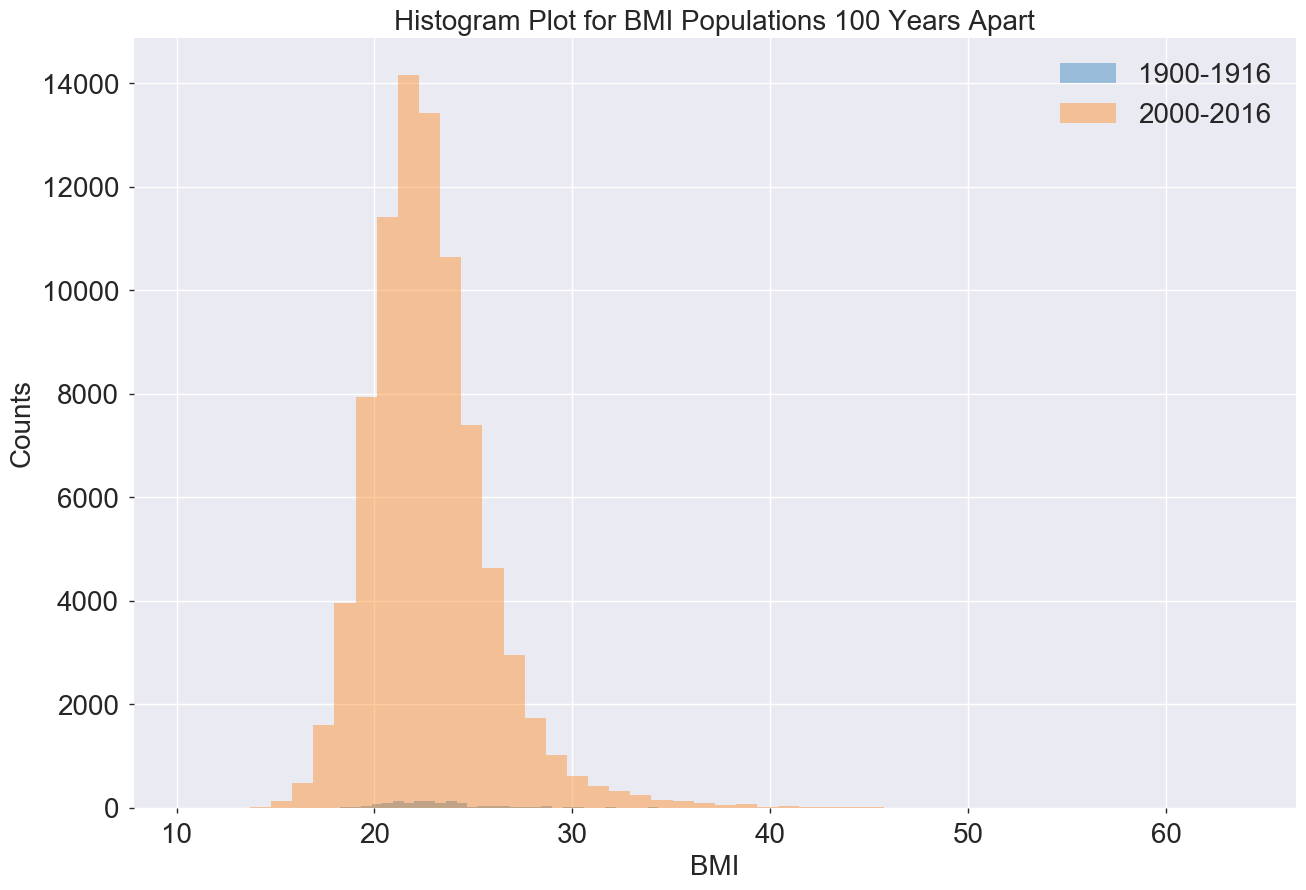

In [16]:
# Looking at histograms
plt.figure(figsize = (15,10))
sns.distplot(bmi_df_1900['BMI'], label = '1900-1916', kde=False)
sns.distplot(bmi_df_2000['BMI'], label = '2000-2016', kde=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BMI', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Histogram Plot for BMI Populations 100 Years Apart', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('HistogramBMI')


There is overwhelmingly more of the 2000-2016 data. To exercise a basic z-test, we have decided to take random samples of the 2000-2016 population and run our hypothesis tests against the known 1900-1916 population. We will be using a z-test with our null hypothesis to mean there is no change between the BMI populations, and the alternative hypothesis to mean there is a difference between the populations. Using standard $\alpha = 0.05$.

\begin{align}
H_0 &: \mathrm{There\ is\ no\ difference\ in\ BMI\ between\ populations}\\
H_1 &: \mathrm{There\ is\ a\ difference}\\
\end{align}


In [10]:
# How much more data is there
len(bmi_df_2000)-len(bmi_df_1900)

82469

In [11]:
len(bmi_df_1900)  

1308

In [12]:
pop_mean1900 = bmi_df_1900['BMI'].mean()
pop_std1900 = bmi_df_1900['BMI'].std()
pop_mean1900

23.26618493684122

In [13]:
0.05*10000

500.0

# Test

We decided to run this z-test 10,000 times and observe all the resulting p-values. If the two populations are one in the same, we would expect a p-value of 0.05 to come up 5% of the time or around 500 times.  

In [175]:
p_values = []
sample_of_thirty_2000_se = pop_std1900/np.sqrt(len(sample_of_thirty_2000))
for n in range(10000):
    sample_of_thirty_2000 = bmi_df_2000['BMI'].sample(n=30)
    sample_of_thirty_2000_mean = np.mean(sample_of_thirty_2000)
    z = (sample_of_thirty_2000_mean - pop_mean1900)/sample_of_thirty_2000_se

    
    p_values.append(1 - stats.norm.sf(z))
    

In [176]:
p_arr = np.array(p_values)

In [177]:
len(p_arr[p_arr<0.05])/10000

0.2339

# Result:
We observed a p-value less than our $\alpha$ nearly a quarter of the time. From this simulation, we reject the null hypothesis. These two populations are different. The BMI of the athletes has changed over the 100 years!

Since we have the actual populations, we can observe them and check our statistics. These are plotted below.

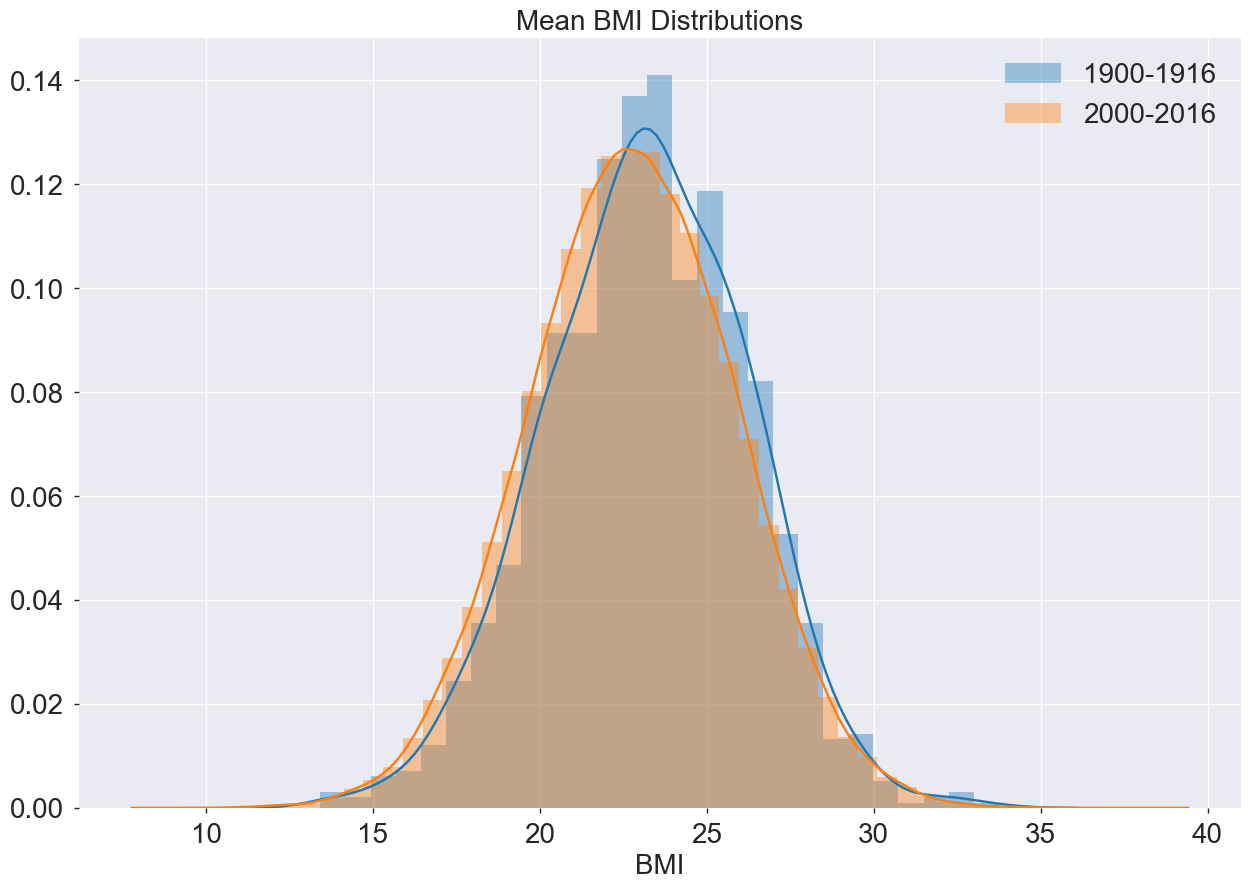

In [178]:
BMI_dist_1900 = np.random.normal(pop_mean1900, pop_std1900, len(bmi_df_1900))
BMI_dist_2000 = np.random.normal(bmi_df_2000['BMI'].mean(), bmi_df_2000['BMI'].std(), len(bmi_df_2000))

fig = plt.figure(figsize = (15, 10))
sns.distplot(BMI_dist_1900, label = '1900-1916', kde=True)
sns.distplot(BMI_dist_2000, label = '2000-2016', kde=True)
plt.title('Mean BMI Distributions', fontsize = 20)
plt.xlabel('BMI', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20})

A bit hard to see, but there is a slight difference in the mean of these two curves. Since we have the whole population of both categories, we can just check to see if our statistics is correct.

In [179]:
bmi_df_1900['BMI'].mean()

23.26618493684122

In [180]:
bmi_df_2000['BMI'].mean()

22.779453669166937

Yep, they're different.

Looks like athletes have a lower BMI 100 years later. Why is that? Have world athletes gotten smaller over time?

A little bit of investigation of the data frame shows that, although there are female athletes in the 1900-1916 population, they are missing data about their height and weight. 

The 2000-2016 has overwhemingly more female athletes in it. So we will run the same hypothesis tests again, one for the males and the other for the females.



In [181]:
# Showing the distribution of females in the olympics over time
female_count = df[df['Sex']=='F']['Year'].value_counts().sort_index()
female_count


1900      33
1904      16
1906      11
1908      47
1912      87
1920     134
1924     261
1928     437
1932     369
1936     549
1948     761
1952    1680
1956    1136
1960    1730
1964    1752
1968    2193
1972    2605
1976    2605
1980    2186
1984    2983
1988    4222
1992    5164
1994    1105
1996    4998
1998    1384
2000    5418
2002    1582
2004    5531
2006    1757
2008    5793
2010    1847
2012    5791
2014    2023
2016    6203
Name: Year, dtype: int64

In [182]:
bmi_df_1900[bmi_df_1900['Sex'] == 'F'] # no bmi data found for female athletes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI


In [183]:
bmi_df[bmi_df['Sex']=='F']['Year'].value_counts().sort_index() # here's what we do have

1920       1
1924       7
1928      56
1932      57
1936      88
1948     137
1952     417
1956     525
1960    1516
1964    1643
1968    2169
1972    2491
1976    2462
1980    2049
1984    2885
1988    4001
1992    4079
1994    1023
1996    4234
1998    1350
2000    5373
2002    1555
2004    5521
2006    1753
2008    5716
2010    1837
2012    5631
2014    1920
2016    6101
Name: Year, dtype: int64

In [184]:
# Performing the same hypothesis test, but on the male athletes only
male2000_df = bmi_df_2000[bmi_df_2000['Sex']=='M']
male2000_df['Year'].value_counts()

2000    8286
2004    7856
2008    7650
2016    7310
2012    6857
2014    2753
2006    2612
2010    2541
2002    2505
Name: Year, dtype: int64

In [185]:
p_values = []

for i in range(10000):
    sample_m_2000 = male2000_df['BMI'].sample(n=30)
    sample_m_2000_mean = np.mean(sample_m_2000)
    sample_m_2000_se = pop_std1900/np.sqrt(len(sample_m_2000))
    z = (sample_m_2000_mean - pop_mean1900)/sample_m_2000_se
    p = 1 - stats.norm.sf(z)
    p_values.append(p)

In [186]:
p_values_arr = np.array(p_values)
len(p_values_arr[p_values_arr < 0.05])

21

# Result
Out of 10,000 trials, we attained a p-value of less than 0.05 only 21 times. 9,978 times out of 10,000 our p-value was greater than 0.05. Based on this evidence, we failed to reject the null hypothesis, which suggests that the BMI has not changed for male athletes in the Olympics over the last 100 years.

In [187]:
# Again, we have the populations and can just check to confirm our statistics
male2000_df['BMI'].mean()

23.787136059578533

In [188]:
bmi_df_1900['BMI'].mean() # No statistically significant difference

23.26618493684122

# Have the Female Athletes BMI Changed Over Time?

#  Does the US perform better when hosting the Olympics or when abroad?
We will observe the top 5 sports in which the US competes in at home and abroad and do an ANOVA test to see if there is any signficant difference in the gold medals won. To do this, we will judge the top 5 categories by the number of gold medals won. That is for the top 5 events, we will count the number of gold medals won at home in the first column and the number of gold medals won away in the second column. We will then standardize the gold medal count by dividing by the number of events competed in. On this data frame, we then perform an ANOVA test.

Since the US has participated in the Olympics away far more times than at home, we randomly sample the away data to pick 5 cities for comparison.

In [190]:
host_usa_df = bmi_df[(bmi_df['City']=='Atlanta') 
                            | (bmi_df['City']=='Los Angeles') | (bmi_df['City']=='Salt Lake City')
                            | (bmi_df['City']=='St. Louis') | (bmi_df['City']=='Lake Placid') 
                            | (bmi_df['City']=='Squaw Valley')]

In [191]:
host_usa_df['City'].value_counts()

Atlanta           11816
Los Angeles        9352
Salt Lake City     4060
Lake Placid        1417
Squaw Valley        512
St. Louis           119
Name: City, dtype: int64

In [192]:
usa_home = host_usa_df[host_usa_df['region']=='USA']

In [196]:
guest_usa_df = bmi_df[(bmi_df['City']!='Atlanta') 
                            & (bmi_df['City']!='Los Angeles') & (bmi_df['City']!='Salt Lake City')
                            & (bmi_df['City']!='St. Louis') & (bmi_df['City']!='Lake Placid') 
                            & (bmi_df['City']!='Squaw Valley')]
guest_usa_df['City'].value_counts()

London                    13768
Sydney                    13659
Athina                    13618
Rio de Janeiro            13411
Beijing                   13366
Seoul                     11591
Barcelona                 10310
Munich                     9838
Mexico City                8396
Montreal                   8261
Roma                       7521
Tokyo                      7368
Moskva                     6843
Sochi                      4673
Vancouver                  4378
Torino                     4365
Nagano                     3518
Lillehammer                2971
Albertville                2783
Innsbruck                  2645
Melbourne                  2153
Calgary                    2018
Sarajevo                   1951
Helsinki                   1914
Grenoble                   1801
Sapporo                    1635
Berlin                      827
Stockholm                   657
Amsterdam                   622
Paris                       614
Antwerpen                   428
Cortina 

In [198]:
usa_away = guest_usa_df[guest_usa_df['region']=='USA']

In [199]:
usa_home['Medal'].value_counts()

Gold      452
Silver    249
Bronze    132
Name: Medal, dtype: int64

In [201]:
usa_away['Medal'].value_counts()

Gold      1663
Silver    1037
Bronze     850
Name: Medal, dtype: int64

In [ ]:
usa_away['City'].sample(n=6) # originally gave cities found below

In [209]:
usa_away_sample = usa_away[(usa_away['City'] == 'Seoul') | (usa_away['City'] == 'Sarajevo')|
                           (usa_away['City'] == 'Vancouver')| (usa_away['City'] == 'Paris')|
                           (usa_away['City'] == 'Athina') | (usa_away['City'] == 'Sydney')]

In [219]:
usa_away_sports = usa_away[(usa_away['Sport']=='Swimming') | (usa_away['Sport']== 'Athletics') | 
                           (usa_away['Sport'] == 'Basketball')
                           | (usa_away['Sport']== 'Rowing') | (usa_away['Sport']== 'Football')]

usa_away_sports['Sport'].value_counts()

Athletics     2555
Swimming      1143
Rowing         564
Basketball     293
Football       180
Name: Sport, dtype: int64

In [222]:
usa_home_sports = usa_home[(usa_home['Sport']=='Swimming') | (usa_home['Sport']== 'Athletics') | 
                           (usa_home['Sport'] == 'Basketball')
                           | (usa_home['Sport']== 'Rowing') | (usa_home['Sport']== 'Football')]
usa_home_sports['Sport'].value_counts()

Athletics     423
Swimming      179
Rowing        113
Basketball     48
Football       38
Name: Sport, dtype: int64

In [223]:
usa_away_sports[usa_away_sports['Medal']=='Gold']['Sport'].value_counts()

Swimming      467
Athletics     427
Basketball    233
Rowing         88
Football       51
Name: Sport, dtype: int64

In [224]:
usa_home_sports[usa_home_sports['Medal']=='Gold']['Sport'].value_counts()

Athletics     104
Swimming       99
Basketball     48
Rowing         22
Football       15
Name: Sport, dtype: int64

In [225]:
usa_away_sports_sample = usa_away_sports.sample(n=801)

In [226]:
anova = pd.DataFrame(usa_home_sports[usa_home_sports['Medal']=='Gold']['Sport'].value_counts())

In [227]:
anova.columns = ['usa_home']

In [228]:
anova['usa_away'] = usa_away_sports_sample[usa_away_sports['Medal']=='Gold']['Sport'].value_counts()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [229]:
len(usa_home['Sport'].value_counts())

48

In [230]:
len(usa_away['Sport'].value_counts())

54

In [231]:
anova['usa_home'] = anova['usa_home']/48

In [232]:
anova['usa_away'] = anova['usa_away']/54

In [233]:
anova

,usa_home,usa_away
Athletics,2.166667,1.240741
Swimming,2.062500,1.444444
Basketball,1.000000,1.074074
Rowing,0.458333,0.388889
Football,0.312500,0.148148


In [234]:
x1_bar = anova['usa_home'].mean()
x2_bar = df_anova['usa_away'].mean()

x_2bar = (x1_bar + x2_bar)/2

In [235]:
SST_to_sum = []
for number in range(5):
    SST_to_sum.append((anova.iloc[number][0]-x_2bar)**2)
    SST_to_sum.append((anova.iloc[number][1]-x_2bar)**2)
    
SST = sum(SST_to_sum)
SST

58762.51029449586

In [236]:
SSW = (104-x1_bar)**2 + (99 - x1_bar)**2 + (48-x1_bar)**2 + (22-x1_bar)**2 + (15-x1_bar)**2 +\
      (74-x2_bar)**2 + (94-x2_bar)**2 + (32-x2_bar)**2 + (13-x2_bar)**2 + (8-x2_bar)**2 
SSW

89210.13888888888

In [237]:
SSB = 6*(x1_bar-x_2bar)**2 + 6*(x2_bar-x_2bar)**2

In [238]:
m = 2
n = 5

In [239]:
F_stat = ((SSB/(m-1))/((SSW/(m*(n-1)))))
F_stat

6.294926043844668

# Critical F value is 5.79

# Our F stat is 6.29

Since our F stat is above the critical value, we reject the null hypothesis. This suggests performance is the better for the U.S. when hosting the olympics.
